In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns


fight_data = pd.read_csv('fight_data_cleaned.csv')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y')

fight_data['date'] = fight_data['date'].apply(parse_date) # Convert to datetime
fight_data.dropna(subset=['date'], inplace=True) # Drop rows with invalid dates
fight_data['year'] = fight_data['date'].dt.year
fight_data.drop(columns=['date'])
fighters = fight_data[['R_fighter', 'B_fighter', 'R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs', 'Winner']].copy()


# Define features and target
features = ['R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs']
target = ['Winner']
X = fighters[features]
y = fighters[target]

In [44]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def print_result(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Output the accuracies
    print(model)
    print(classification_report(y_test, y_pred))
    print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))

    # Output the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=['Red', 'Blue'])
    
def ShowFeatureImportance(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = model.fit(X_train, y_train)

    hist_df = pd.DataFrame({'Feature': X.columns, 'Feature importance': model.feature_importances_})
    hist_df = hist_df.sort_values(by='Feature importance', ascending=True)
    plt.figure(figsize=(10, 4))
    plt.barh(hist_df['Feature'], hist_df['Feature importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(model)
    plt.tight_layout()
    plt.show()
    

DecisionTreeClassifier()
              precision    recall  f1-score   support

        Blue       0.41      0.41      0.41       520
         Red       0.57      0.57      0.57       704

    accuracy                           0.50      1224
   macro avg       0.49      0.49      0.49      1224
weighted avg       0.50      0.50      0.50      1224

Balanced Accuracy:  0.4910292832167832


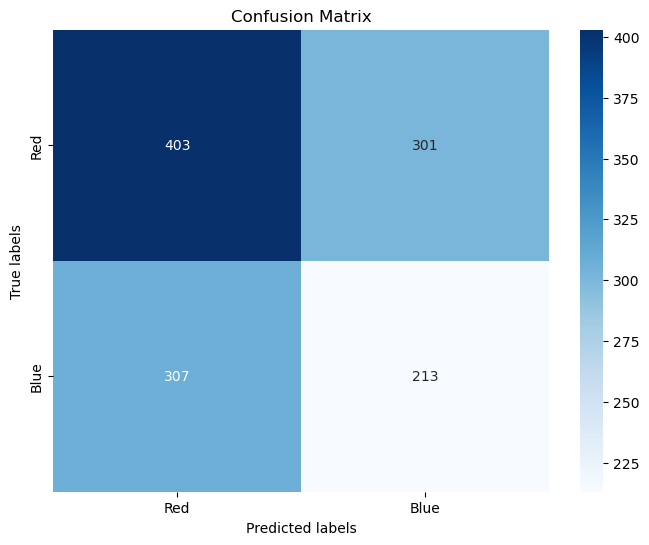

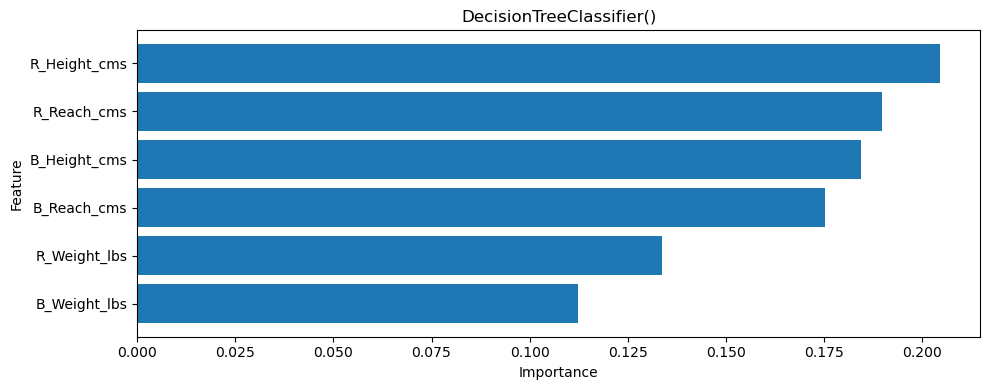

GaussianNB()
              precision    recall  f1-score   support

        Blue       0.25      0.00      0.00       522
         Red       0.57      1.00      0.73       702

    accuracy                           0.57      1224
   macro avg       0.41      0.50      0.37      1224
weighted avg       0.44      0.57      0.42      1224

Balanced Accuracy:  0.49882110226937815


/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


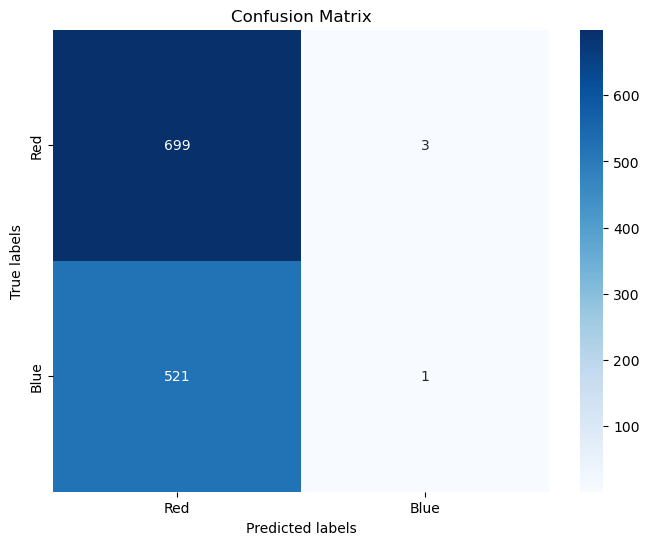

/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

        Blue       0.46      0.37      0.41       522
         Red       0.59      0.68      0.63       702

    accuracy                           0.55      1224
   macro avg       0.52      0.52      0.52      1224
weighted avg       0.53      0.55      0.54      1224

Balanced Accuracy:  0.5229393850083506


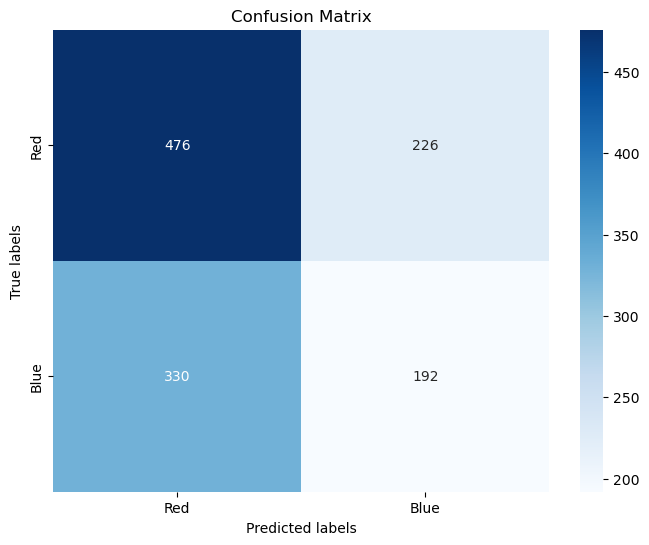

/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


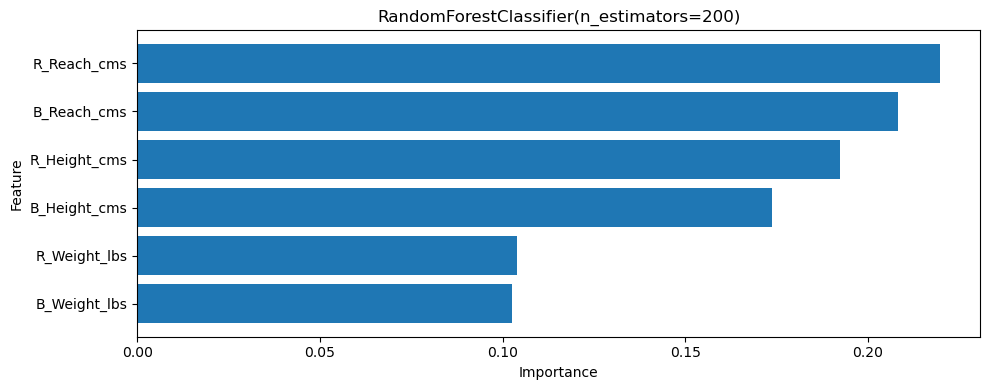

KNeighborsClassifier()
              precision    recall  f1-score   support

        Blue       0.40      0.33      0.37       517
         Red       0.57      0.64      0.60       707

    accuracy                           0.51      1224
   macro avg       0.49      0.49      0.48      1224
weighted avg       0.50      0.51      0.50      1224

Balanced Accuracy:  0.48697194947458267


/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


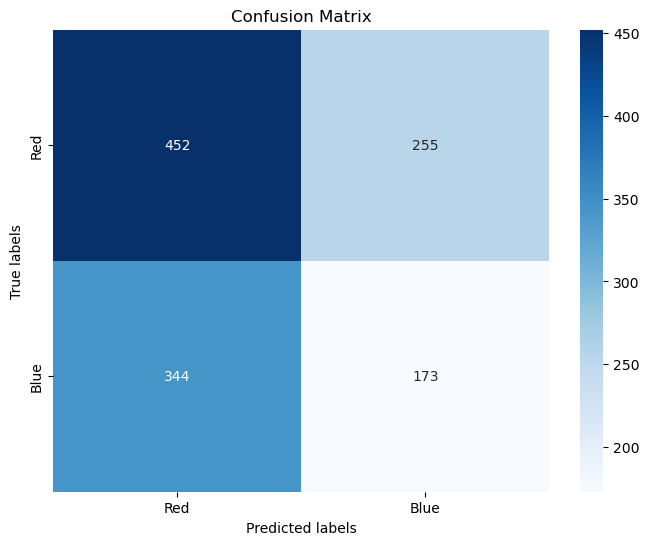

In [57]:
# DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
print_result(X, y, model_dt)
ShowFeatureImportance(X, y, model_dt)

# GaussianNB
model_nb = GaussianNB()
print_result(X, y, model_nb)

# RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200)
print_result(X, y, model_rf)
ShowFeatureImportance(X, y, model_rf)

# KNeighborsClassifier
model_knn = KNeighborsClassifier(5)
print_result(X, y, model_knn)